<a href="https://colab.research.google.com/github/NerdManV/Physics/blob/main/StringTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lucas Vigil
#Simulation of a string instrument

import numpy as np
import math
import matplotlib
#import winsound #must be run in a windows based coding environment

#Variables and list initialization
Xstep= 0.001
Tstep= 0.000001
T= 16 #Tension of the string
L= 1 #Length of the string in meters
mu= 0.001 #Linear mass density
V= math.sqrt(T/mu)
A= 0.5 #Wave amplitude
B= 1/4 #Fraction of string length where guitar is plucked
U= [] #Initialize list for initial pluck
X=[] #Initialize list of X values
r=V*Tstep/Xstep #speed variable for main function

print("Wave speed =", V, "m/s")

Wave speed = 126.49110640673517 m/s


In [ ]:
def GuitarInitial(A, L, i, Xstep): #Gives upward triangular pluck with height A, centered at B*L
  if i*Xstep < B*L:
    return A*i*Xstep/(B*L)
  else:
    return -A*(i*Xstep-L)/((1-B)*L)


def PianoInitial(A, L, i, Xstep): #Gives downward parabolic hit with height A, centered at L/4
  if i*Xstep >= L/2:
    return 0
  else:
    return A*(16/(L**2))*((i*Xstep-(L/4))**2)-A

In [ ]:
#Create Initial lists based on above functions
for i in range(0, int(L/Xstep)):
  U.append(PianoInitial(A, L, i, Xstep)) #Can change between GuitarInitial and PianoInitial
  X.append(i*Xstep)


def WaveMain(U, i): #Main wave propogation function
  n=0
  Wave= [U] #Create list with initial condutions
  U2= [] #Creates multiple versions of list of zeroes
  for i in range(0, int(L/Xstep)):
    U2.append(0)

  time_max = 10000 #Number of iterations that function runs for

  while n<= time_max: #Adds U2 for every time iteration
    Wave.append(U2.copy())
    n+=1  
  n=0
  #Plots initial pluck
  #matplotlib.pyplot.plot(X, Wave[n])
  #matplotlib.pyplot.show

  #Holds ends of string at zero
  Wave[n][0] = 0
  Wave[n][-1] = 0

  for i in range(1, int(L/Xstep)-1):
    Wave[1][i]=(2*(1-r**2)*Wave[0][i] - Wave[0][i] + (r**2)*(Wave[0][i+1]+Wave[0][i-1])) #Wave Equation rearranged and iterated over
  
  n=1
  while n <= (time_max -1):
    Wave[n][0] = 0
    Wave[n][-1] = 0
    for i in range(1, int(L/Xstep)-1):
      Wave[n+1][i]=(2*(1-r**2)*Wave[n][i] - Wave[n-1][i] + (r**2)*(Wave[n][i+1]+Wave[n][i-1])) #Wave Equation rearranged and iterated over, for all time iterations
    if (n % 100 == 0): #Plots wave at some iterations
      matplotlib.pyplot.plot(X, Wave[n])
      matplotlib.pyplot.show
    n+=1
  print("Runtime =", time_max*Tstep, "seconds") #Prints runtime of simulation in seconds

Runtime = 0.01 seconds


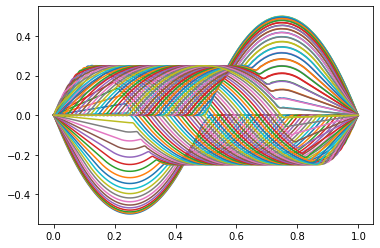

In [ ]:
WaveMain(U, i)

In [ ]:
def GetPitch(L, V):
  Freq = V*(1/(2*L)) #Calculates frequency of sound
  Notes= ["G#", "A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G"] #List of musical notes
  print("Frequency =", round(Freq, 2), "Hz")
  n = 12*np.log2(Freq/440) +49 #Calculates the note number
  #Maps note number to octave and sound
  if round(n, 0) in range(1,4):
    Octave = 0
  elif round(n, 0) in range(4,16):
    Octave = 1
  elif round(n, 0) in range(16,28):
    Octave = 2
  elif round(n, 0) in range(28,40):
    Octave = 3
  elif round(n, 0) in range(40,52):
    Octave = 4
  elif round(n, 0) in range(52,64):
    Octave = 5
  elif round(n, 0) in range(64,76):
    Octave = 6
  elif round(n, 0) in range(76,88):
    Octave = 7
  elif round(n, 0) == 88:
    Octave = 8
  else:
    print("This is outside the given set of octaves, 0-8")
    return
  i = int(round(n, 0) % 12) #Matches note number to one of the note letters
  print("This will produce a sound closest to the note", Notes[i] + str(Octave))
  #if Freq in range(37, 32000): #Can play a beep with the given frequency
    #winsound.Beep(Freq, 1000)

In [ ]:
GetPitch(L, V)

Frequency = 63.25 Hz
This will produce a sound closest to the note B1
